In [17]:
# A bunch of imports
import numpy as np
from sklearn.datasets import load_iris

import graphviz 
# If you cannot import graphviz then you may need to install it: 
# pip install graphviz


import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import export_graphviz, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay

In [18]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [19]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=10)

In [20]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

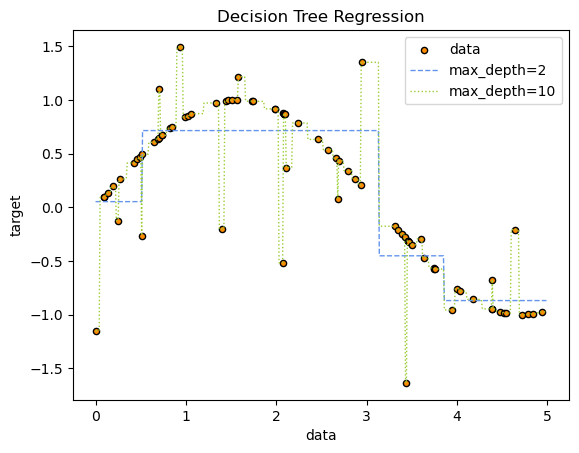

In [22]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=1, linestyle='dashed')
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=10", linewidth=1, linestyle='dotted')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [7]:
# A teeny tiny toy example: logic XOR
X = [[0, 0], [1, 1], [0,1],[1,0]]
Y = [0,0,1,1]
clf = DecisionTreeClassifier()
clf = clf.fit(X, Y)

# Make prediction
clf.predict([[2., 2.]])
clf.predict_proba([[2., 2.]])

array([[1., 0.]])

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

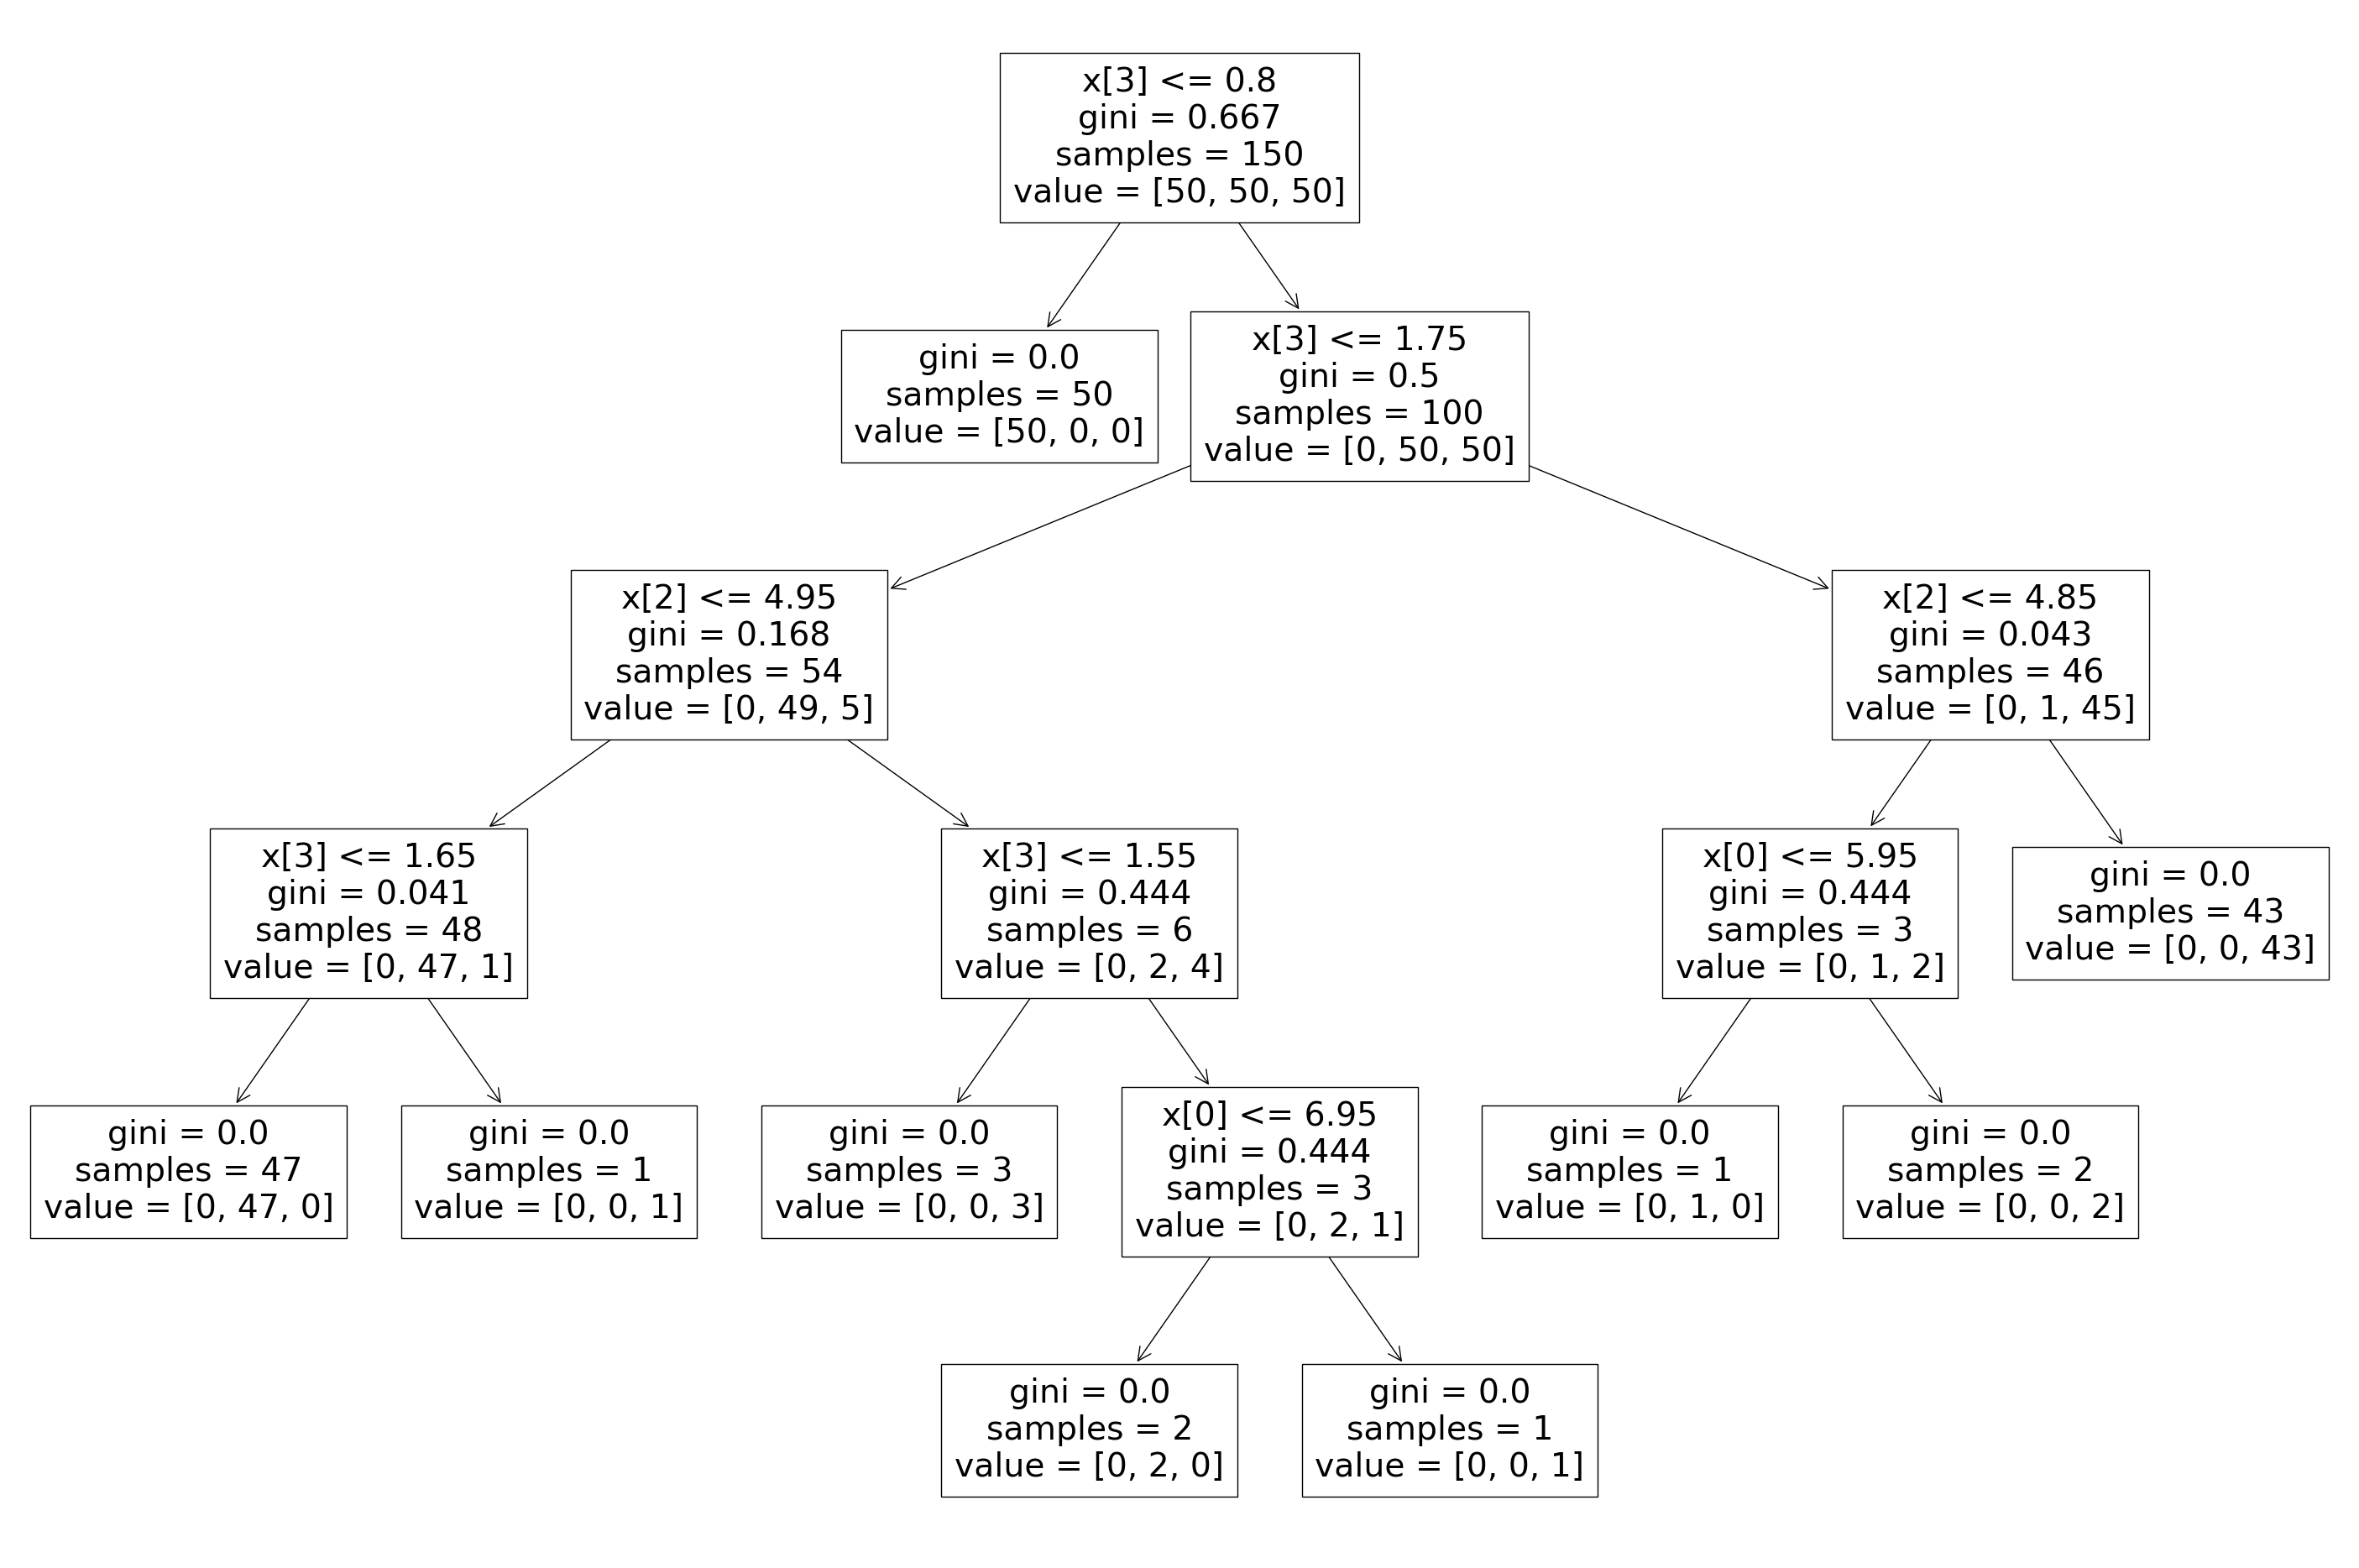

In [23]:
#%% Visualise decision tree

iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
plt.figure(figsize=(36, 24))
plot_tree(clf)

dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

#%% Make it more colorful
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
# Save it to a pdf named iris.pdf: 
# graph.render("iris")

In [10]:
#%% Print actual decision
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



C:\Users\demon\AppData\Local\Temp\ipykernel_16632\2824140131.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\demon\AppData\Local\Temp\ipykernel_16632\2824140131.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\demon\AppData\Local\Temp\ipykernel_16632\2824140131.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\demon\AppData\Local\Temp\ipykernel_16632\2824140131.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\demon\AppData\Local\Temp\ipykernel_16632\2824140131.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\demon\AppData\Local\Temp\ipykernel_16632\2824140131.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 

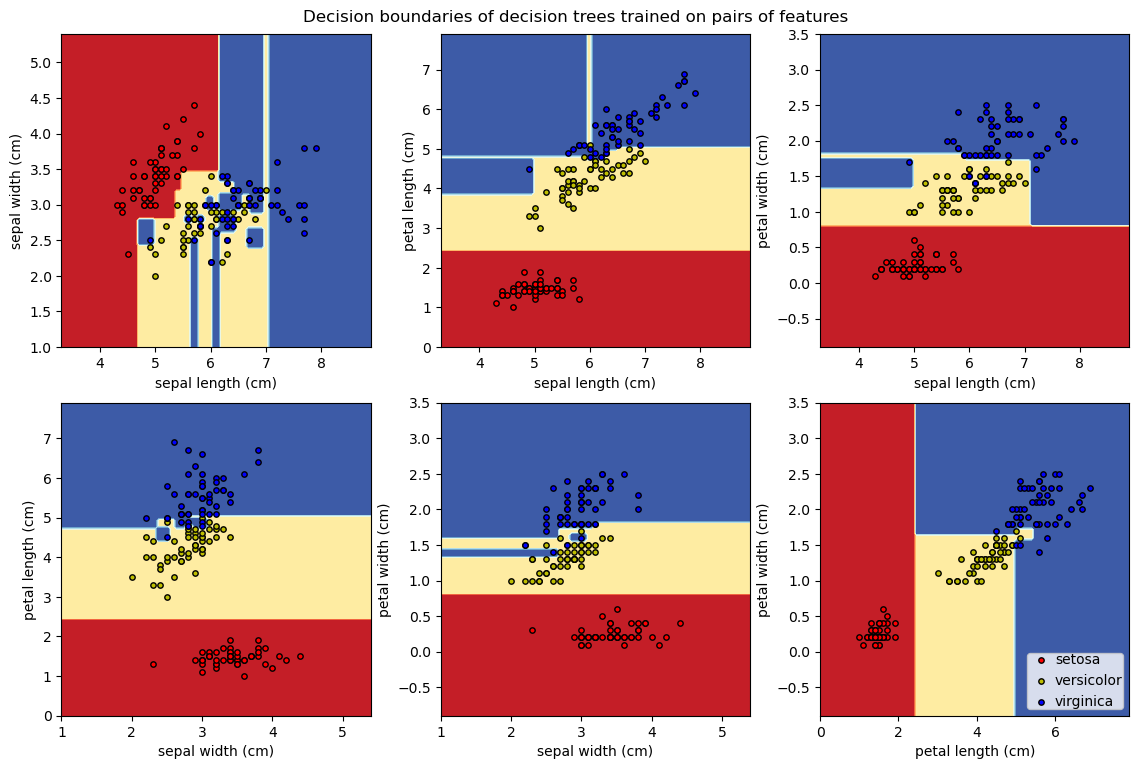

In [24]:
#%% Visualise decision boundaries
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

plt.figure(figsize=(12, 8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision boundaries of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

In [34]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

plt.figure(figsize=(16, 12))

pair = [1,0]

X = iris.data[:, pair]
y = iris.target

print(f"X = {X.shape}")
print(f"X = {y.shape}")
pair

X = (150, 2)
X = (150,)


[1, 0]

<Figure size 1600x1200 with 0 Axes>

Depth = 1
Depth = 2
Depth = 3


C:\Users\demon\AppData\Local\Temp\ipykernel_16632\1793920423.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\demon\AppData\Local\Temp\ipykernel_16632\1793920423.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\demon\AppData\Local\Temp\ipykernel_16632\1793920423.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\demon\AppData\Local\Temp\ipykernel_16632\1793920423.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


Depth = 4
Depth = 10


C:\Users\demon\AppData\Local\Temp\ipykernel_16632\1793920423.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


Depth = 20


C:\Users\demon\AppData\Local\Temp\ipykernel_16632\1793920423.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


Depth = 40


C:\Users\demon\AppData\Local\Temp\ipykernel_16632\1793920423.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


Depth = 50


C:\Users\demon\AppData\Local\Temp\ipykernel_16632\1793920423.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


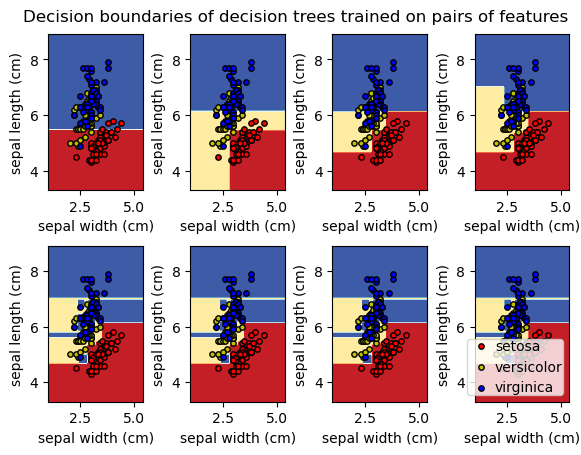

In [35]:
# Exercise 
depths = [1,2,3,4,10,20,40,50]
for idx, depth in enumerate(depths):

    print(f"Depth = {depth}")
    # Train
    clf = DecisionTreeClassifier(max_depth=depth).fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 4, idx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision boundaries of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, random_state=42)

# Instantiate the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'max_depth': [1, 2, 3, 4, 10, 20, 30, 50],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with the instantiated classifier
gsCV = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
gsCV.fit(x_train, y_train)

# Get the best parameters
best_params = gsCV.best_params_

# Create a new DecisionTreeClassifier with the best parameters
bestClf = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'])
bestClf.fit(x_train, y_train)

# Make predictions and calculate accuracy
y_pred = bestClf.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0
